#About Pathrise  
###Pathrise is an online program for tech professionals that provides 1-on-1 mentorship, training and advice to help you land your next job.

###Pathrise's core mission is centered around empowering job seekers in the tech industry by providing personalized mentorship, guidance, and support throughout their job search journey

#Understanding the Objective
###The goal is to predict whether individuals will find a job or not, as well as forecast the duration in terms of days spent on the project until finding the desired job.



#Import dataset

In [1]:
from google.colab import files

#Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mnso
from sklearn.impute import SimpleImputer

from scipy import stats
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics




#Read the data

In [3]:
upload=files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


In [4]:
df=pd.read_excel('Data_Pathrise.xlsx')

In [5]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


# Data Understanding

In [59]:
df.head()

,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,-1.575635,-1.213231,0.0,0,-0.555633,1.166482,1.008209,-1.694312,1.075465,-0.777517,-0.739628,-0.695471,-0.168987,-0.899805
3,-0.132573,-1.213231,0.0,0,-1.965369,-0.827036,1.008209,-1.214350,1.075465,-0.777517,1.027344,-0.224503,-0.168987,-1.313653
4,0.588958,-1.288109,89.0,1,0.854104,-0.827036,-1.195963,0.225537,-1.098421,-0.019413,2.794315,1.188401,-0.168987,-0.899805
5,0.588958,-1.288109,0.0,0,-1.260501,1.166482,-1.195963,1.665423,-0.373792,0.359639,1.027344,1.188401,-0.168987,-0.899805
6,0.588958,-1.213231,0.0,0,-1.260501,1.166482,1.008209,-0.254426,-0.373792,0.359639,-0.739628,-0.525922,-0.168987,-1.727502


In [6]:
df.shape

(2544, 16)

In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

**Percent of 	Missing value for each columns**

In [8]:
def missing_vlues_table(df):
      #Total missing values
      mis_val = df.isnull().sum()

      #Percentage of missing values
      mis_val_percent = 100*df.isnull().sum()/len(df)

      #Make a table with the results
      mis_val_table = pd.concat([mis_val,mis_val_percent],axis = 1)

      #Rename the columns
      mis_val_table_ren_columns = mis_val_table.rename (
          columns = {0: 'Missing value', 1: '% of total value'}
      )

      #Sort the table by percentage of missing values descending
      mis_val_table_ren_columns = mis_val_table_ren_columns[
          mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
              '% of total value' , ascending=False).round(1)

      #Return the datafeame with missing information
      return mis_val_table_ren_columns

In [9]:
data_missing = missing_vlues_table(df)
data_missing

,Missing value,% of total value
program_duration_days,616,24.2
gender,492,19.3
work_authorization_status,284,11.2
employment_status,229,9.0
professional_experience,222,8.7
number_of_interviews,218,8.6
length_of_job_search,74,2.9
highest_level_of_education,58,2.3
biggest_challenge_in_search,24,0.9
race,18,0.7


**heatmap for relation of  missing values**

<Axes: >

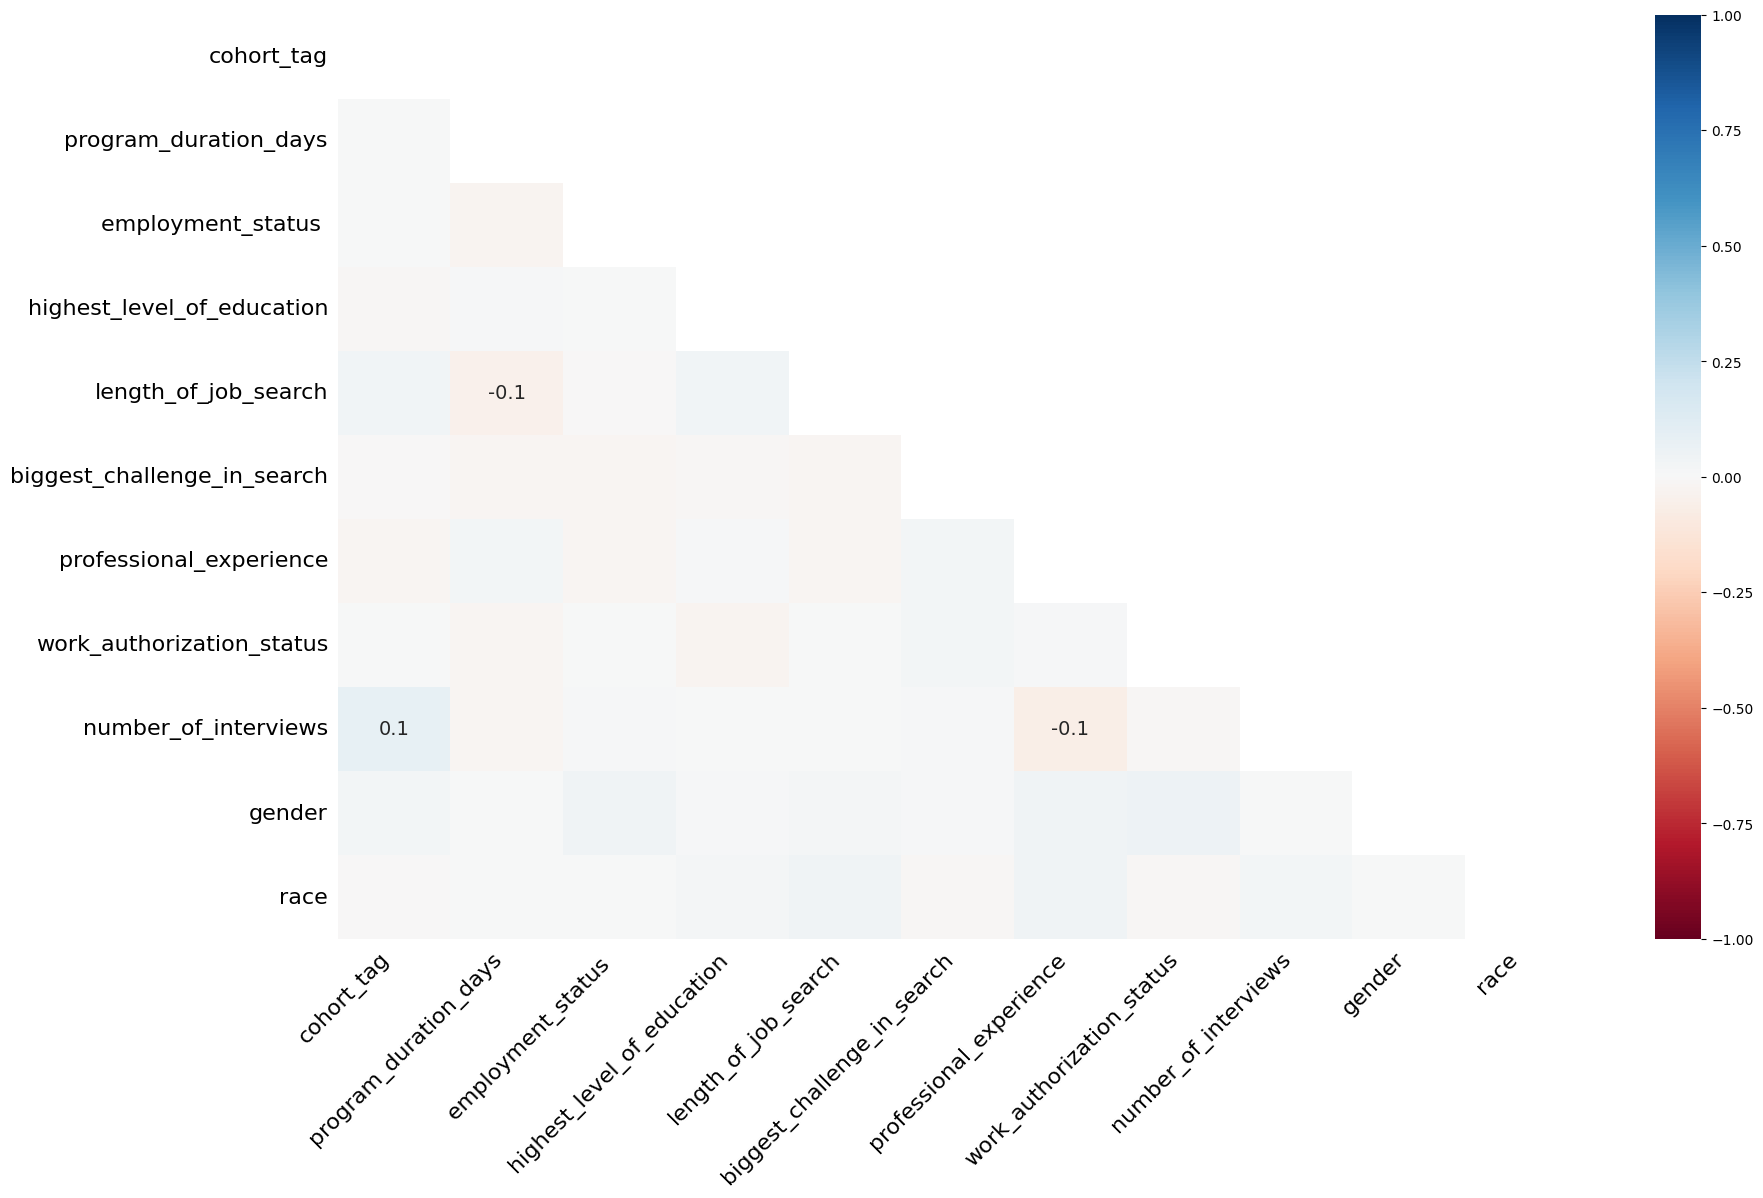

In [10]:
mnso.heatmap(df)

#Clean Data



*   drop null value for program_duration_days's column
*   drop deferred value for pathrise_status' column



In [11]:
df.dropna(subset=['program_duration_days'], how='any' ,inplace=True)

In [12]:
df=df[df['pathrise_status']!='Deferred']

#Percent of missing value after revoming missing of program durations

In [13]:
def missing_vlues_table(df):
      #Total missing values
      mis_val = df.isnull().sum()

      #Percentage of missing values
      mis_val_percent = 100*df.isnull().sum()/len(df)

      #Make a table with the results
      mis_val_table = pd.concat([mis_val,mis_val_percent],axis = 1)

      #Rename the columns
      mis_val_table_ren_columns = mis_val_table.rename (
          columns = {0: 'Missing value', 1: '% of total value'}
      )

      #Sort the table by percentage of missing values descending
      mis_val_table_ren_columns = mis_val_table_ren_columns[
          mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
              '% of total value' , ascending=False).round(1)

      #Return the datafeame with missing information
      return mis_val_table_ren_columns

In [14]:
data_missing = missing_vlues_table(df)
data_missing

,Missing value,% of total value
gender,367,19.4
work_authorization_status,220,11.6
employment_status,177,9.3
number_of_interviews,171,9.0
professional_experience,156,8.2
length_of_job_search,65,3.4
highest_level_of_education,40,2.1
biggest_challenge_in_search,20,1.1
race,13,0.7
cohort_tag,6,0.3


In [15]:
df.shape

(1894, 16)

#Sorting missing  value

In [16]:
df.isnull().sum().sort_values(ascending=False)

gender                         367
work_authorization_status      220
employment_status              177
number_of_interviews           171
professional_experience        156
length_of_job_search            65
highest_level_of_education      40
biggest_challenge_in_search     20
race                            13
cohort_tag                       6
id                               0
pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
number_of_applications           0
dtype: int64

#Replacing Mode for some columns

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

columns_to_impute = ['highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search',  'race']

for column in columns_to_impute:
    df[column] = imputer.fit_transform(df[[column]]).ravel()

<ipython-input-18-6e9a767dc24a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = imputer.fit_transform(df[[column]]).ravel()
<ipython-input-18-6e9a767dc24a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = imputer.fit_transform(df[[column]]).ravel()
<ipython-input-18-6e9a767dc24a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

#Replacing "UnKnown"

In [19]:
df['gender'].value_counts()

gender
Male                        1114
Female                       400
Decline to Self Identify      10
Non-Binary                     3
Name: count, dtype: int64

In [20]:
df['gender'].fillna( 'Unknown' ,inplace=True)
df['gender']

<ipython-input-20-bc426d9680d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].fillna( 'Unknown' ,inplace=True)


2                           Male
3                           Male
4                           Male
5                           Male
6                           Male
                  ...           
2535                     Unknown
2538    Decline to Self Identify
2539                        Male
2540                        Male
2543                        Male
Name: gender, Length: 1894, dtype: object

In [21]:
df['work_authorization_status'].value_counts()

work_authorization_status
Citizen           817
F1 Visa/OPT       478
Green Card        138
F1 Visa/CPT        96
Other              80
H1B                36
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: count, dtype: int64

In [22]:
df['work_authorization_status'].fillna( 'Unknown' ,inplace=True)
df['work_authorization_status']

<ipython-input-22-ff7a336f7bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_authorization_status'].fillna( 'Unknown' ,inplace=True)


2           Citizen
3           Citizen
4       F1 Visa/OPT
5        Green Card
6        Green Card
           ...     
2535        Citizen
2538          Other
2539        Citizen
2540    F1 Visa/OPT
2543     Green Card
Name: work_authorization_status, Length: 1894, dtype: object

In [23]:
df['employment_status '].value_counts()

employment_status 
Student               567
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: count, dtype: int64

In [24]:
df['employment_status '].fillna( 'Unknown' ,inplace=True)
df['employment_status ']

<ipython-input-24-5a66670d1f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_status '].fillna( 'Unknown' ,inplace=True)


2       Employed Part-Time
3               Contractor
4               Unemployed
5       Employed Full-Time
6       Employed Full-Time
               ...        
2535    Employed Full-Time
2538    Employed Part-Time
2539            Contractor
2540               Unknown
2543               Student
Name: employment_status , Length: 1894, dtype: object

In [25]:
df['professional_experience'].value_counts()

professional_experience
1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Name: count, dtype: int64

In [26]:
df['professional_experience'].fillna( 'Unknown' ,inplace=True)
df['professional_experience']

<ipython-input-26-a89875301f99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['professional_experience'].fillna( 'Unknown' ,inplace=True)


2       Less than one year
3       Less than one year
4                1-2 years
5                3-4 years
6                3-4 years
               ...        
2535             3-4 years
2538              5+ years
2539              5+ years
2540             1-2 years
2543             1-2 years
Name: professional_experience, Length: 1894, dtype: object

#Replacing numeric columns by median

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0')])

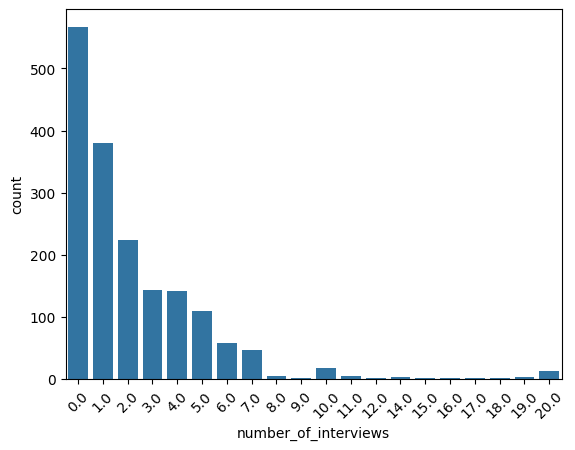

In [27]:
sns.countplot ( x='number_of_interviews' ,data=df)
plt.xticks (rotation=45)

**normality test**

In [28]:
# Run a normality test to determine if I should impute using the mean or median
def is_normal(data):

  _,p = stats.normaltest(data, nan_policy = 'omit')

  if p < 0.05:
        return False
  else:
        return True

In [29]:
is_normal(df['number_of_interviews'])

False

In [30]:
# Since number_of_interviews is not normal, then impute it using the median
num_of_interviews_median = df['number_of_interviews'].median()

df['number_of_interviews'].replace(np.nan, num_of_interviews_median, inplace=True)

<ipython-input-30-a8a0109cb870>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_interviews'].replace(np.nan, num_of_interviews_median, inplace=True)


#Selection of columns for removing

In [31]:
df.drop( columns=['pathrise_status','id'], inplace=True)

<ipython-input-31-6bfdfd323563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop( columns=['pathrise_status','id'], inplace=True)


In [32]:
df.shape

(1894, 14)

**Balancing the placed column**

<Axes: xlabel='placed', ylabel='count'>

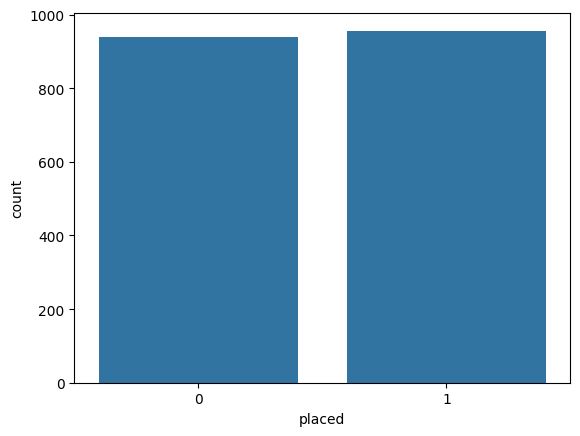

In [33]:
sns.countplot ( x='placed' ,data=df)


#Exploratory Data Analysis (EDA)

# Visualization

<ipython-input-34-8abb95b599d9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'primary_track', data=df,  orient='v' , palette='deep')


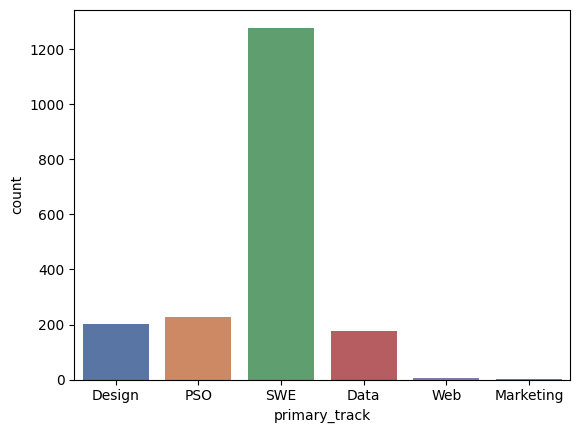

In [34]:
sns.countplot(x= 'primary_track', data=df,  orient='v' , palette='deep')
plt.show()

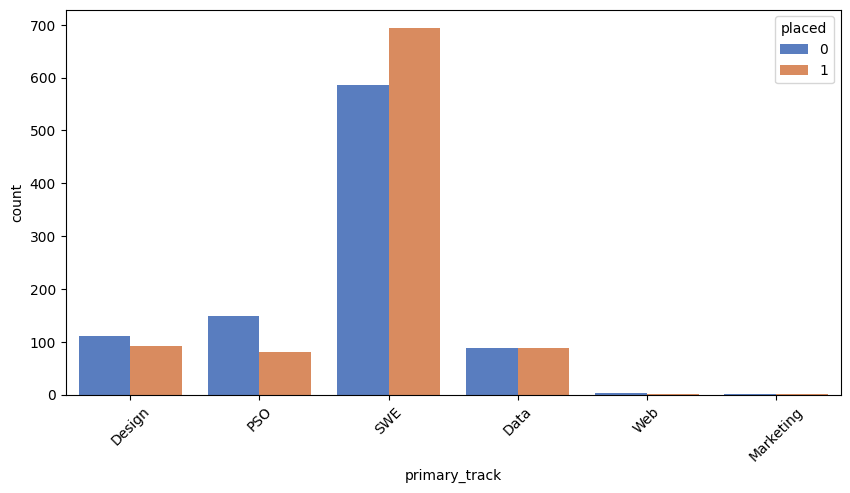

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='primary_track', hue='placed', palette='muted')

plt.xticks(rotation=45)

plt.show()

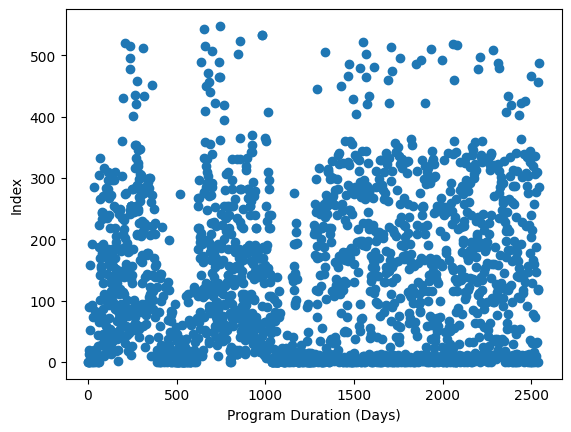

In [ ]:
plt.scatter(df.index, df['program_duration_days'])

plt.ylabel('Index')
plt.xlabel('Program Duration (Days)')

plt.show()

#  نشان دهنده توزیع مدت زمان برنامه برای هر ردیف

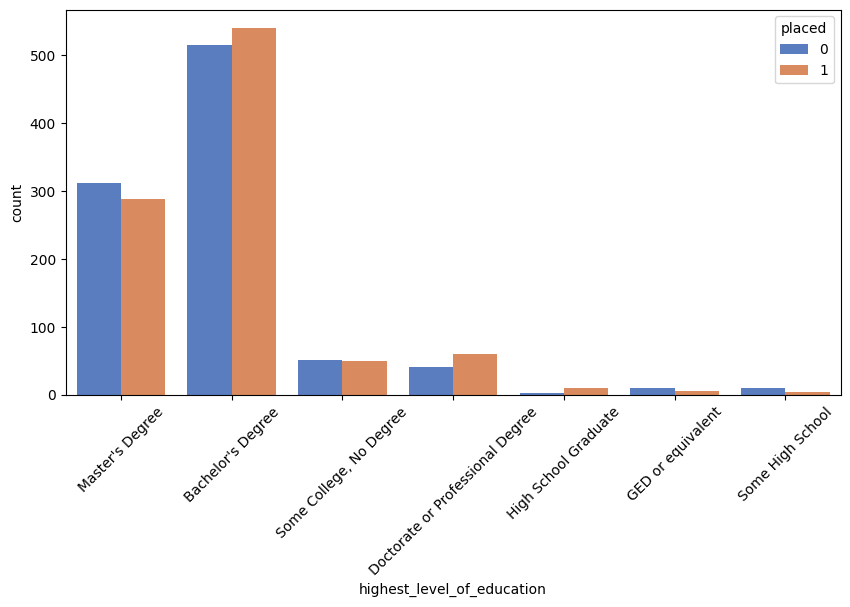

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='highest_level_of_education', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

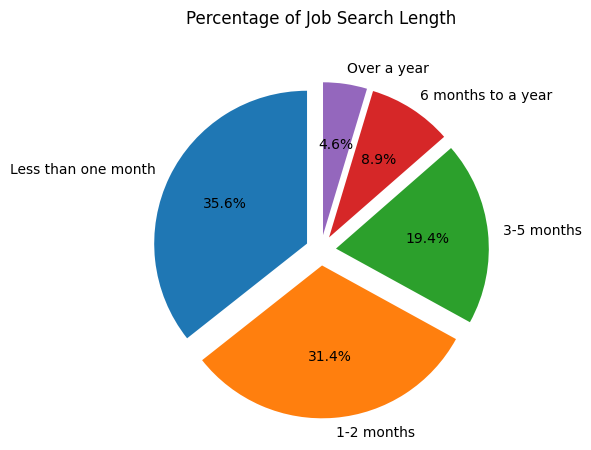

In [ ]:
job_search_counts = df['length_of_job_search'].value_counts()
labels = job_search_counts.index
sizes = job_search_counts.values
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Job Search Length', pad=30)
plt.axis('equal')
plt.show()


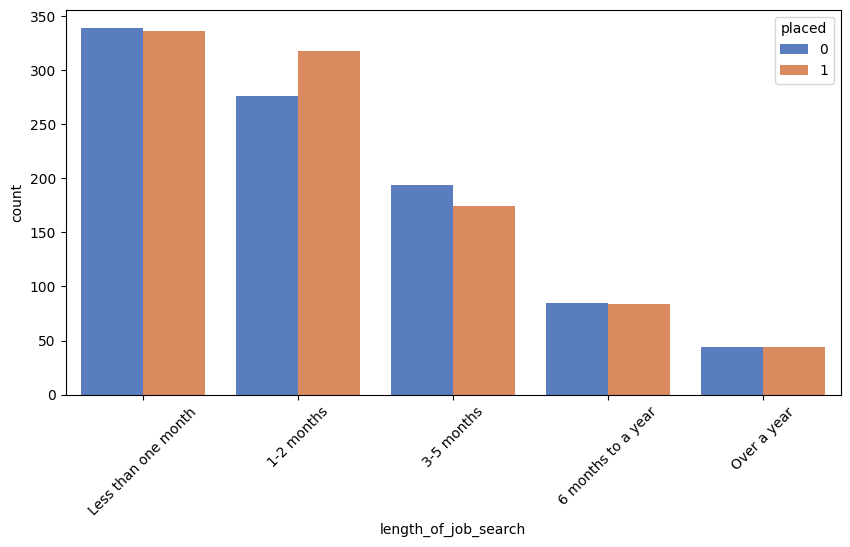

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='length_of_job_search', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

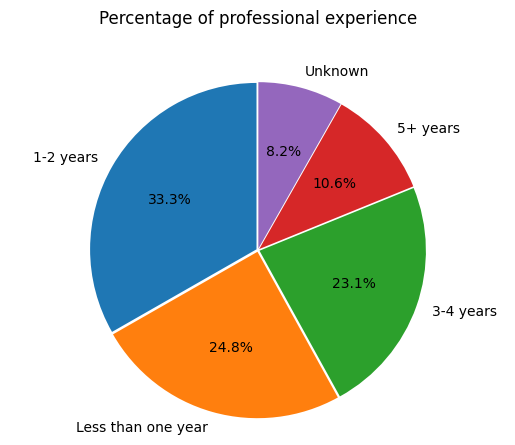

In [ ]:
professional_experience = df['professional_experience'].value_counts()
labels = professional_experience.index
sizes = professional_experience.values
explode = (0.01, 0.01, 0.01, 0.01, 0.01)  # only "explode" the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of professional experience', pad=30)
plt.show()

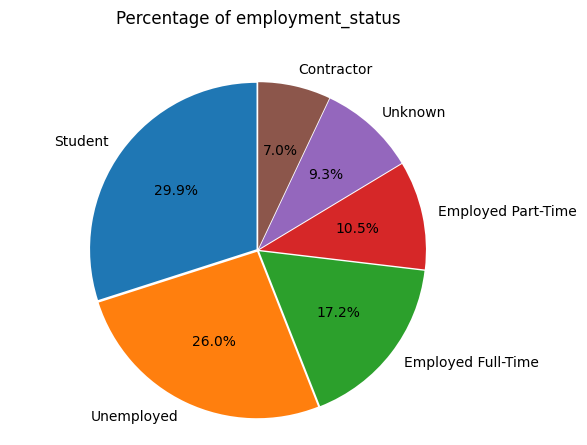

In [ ]:
employment_status = df['employment_status '].value_counts()
labels = employment_status.index
sizes = employment_status.values
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)  # only "explode" the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of employment_status', pad=30)
plt.show()

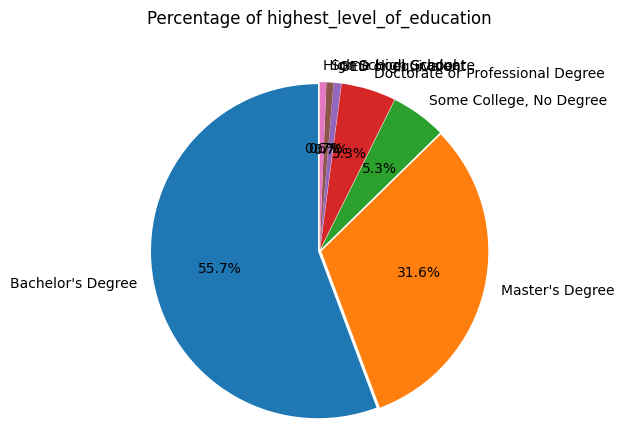

In [ ]:
highest_level_of_education = df['highest_level_of_education'].value_counts()
labels = highest_level_of_education.index
sizes = highest_level_of_education.values
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)  # only "explode" the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of highest_level_of_education', pad=30)
plt.show()

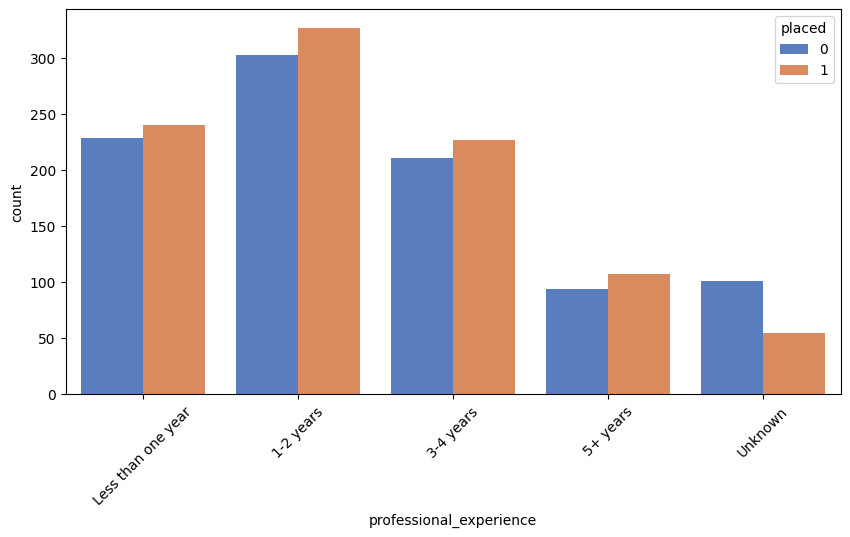

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='professional_experience', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

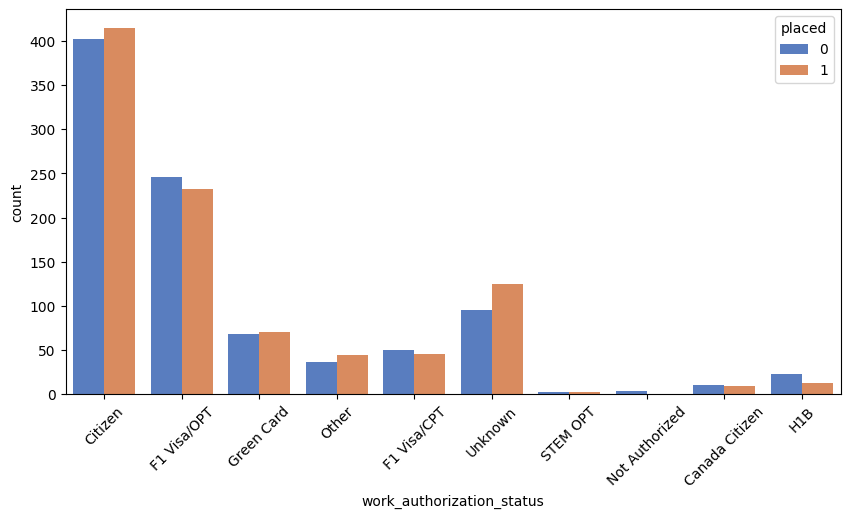

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='work_authorization_status', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

#histplot

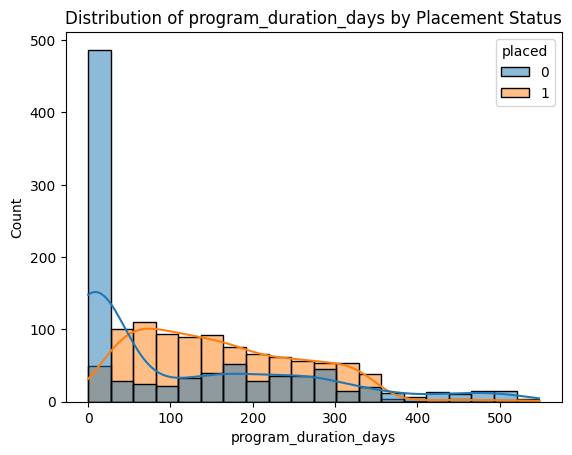

In [ ]:
sns.histplot(data=df, x='program_duration_days', hue='placed', bins=20, kde=True)
plt.xlabel('program_duration_days')
plt.ylabel('Count')
plt.title('Distribution of program_duration_days by Placement Status')
plt.show()

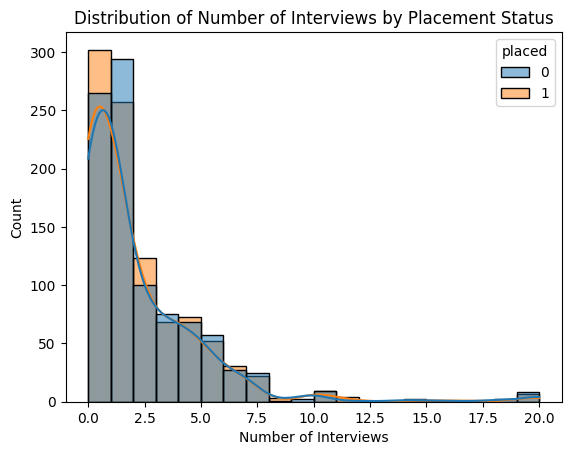

In [ ]:
sns.histplot(data=df, x='number_of_interviews', hue='placed', bins=20, kde=True)
plt.xlabel('Number of Interviews')
plt.ylabel('Count')
plt.title('Distribution of Number of Interviews by Placement Status')
plt.show()

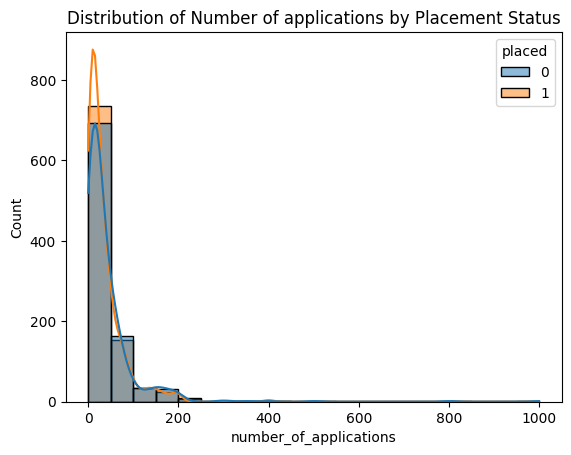

In [ ]:
sns.histplot(data=df, x='number_of_applications', hue='placed', bins=20, kde=True)
plt.xlabel('number_of_applications')
plt.ylabel('Count')
plt.title('Distribution of Number of applications by Placement Status')
plt.show()

#BoxPlot

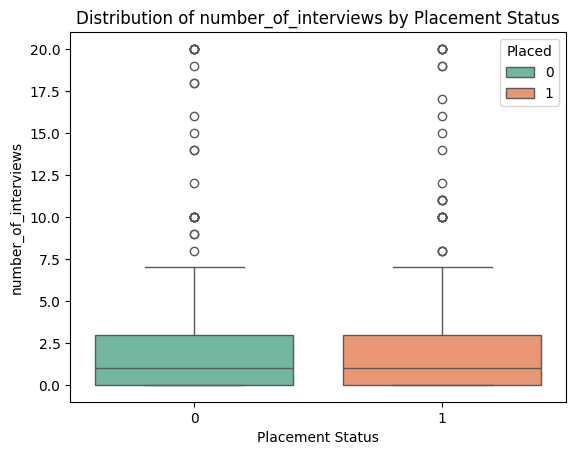

In [ ]:
sns.boxplot(data=df, x='placed', y='number_of_interviews', hue='placed', palette="Set2")
plt.xlabel('Placement Status')
plt.ylabel('number_of_interviews')
plt.title('Distribution of number_of_interviews by Placement Status')
plt.legend(title='Placed', loc='upper right')
plt.show()

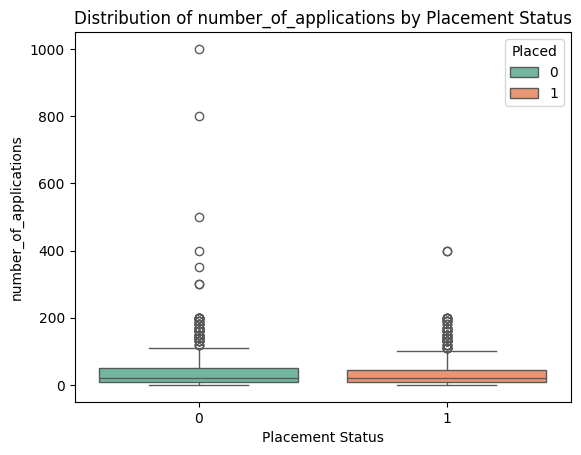

In [ ]:
sns.boxplot(data=df, x='placed', y='number_of_applications', hue='placed', palette="Set2")
plt.xlabel('Placement Status')
plt.ylabel('number_of_applications')
plt.title('Distribution of number_of_applications by Placement Status')
plt.legend(title='Placed', loc='upper right')
plt.show()

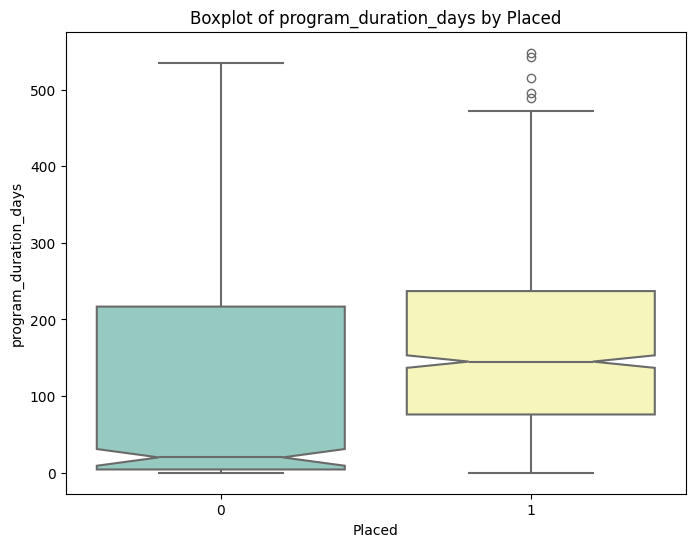

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='placed', y='program_duration_days', data=df, palette='Set3', linewidth=1.5, notch=True)
plt.xlabel('Placed')
plt.ylabel('program_duration_days')
plt.title('Boxplot of program_duration_days by Placed')
plt.show()

#kdeplot for numeric columns

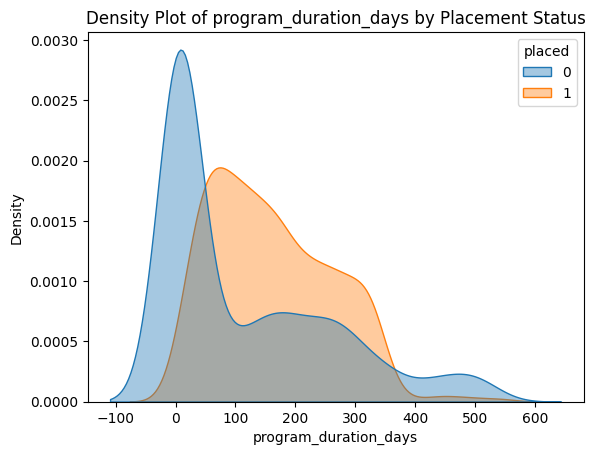

In [ ]:
sns.kdeplot(data=df, x='program_duration_days', hue='placed', fill=True, alpha=0.4)
plt.xlabel('program_duration_days')
plt.title('Density Plot of program_duration_days by Placement Status')
plt.show()

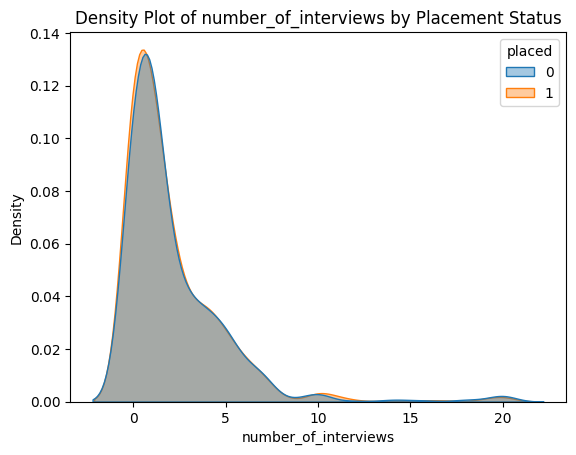

In [ ]:
sns.kdeplot(data=df, x='number_of_interviews', hue='placed', fill=True, alpha=0.4)
plt.xlabel('number_of_interviews')
plt.title('Density Plot of number_of_interviews by Placement Status')
plt.show()

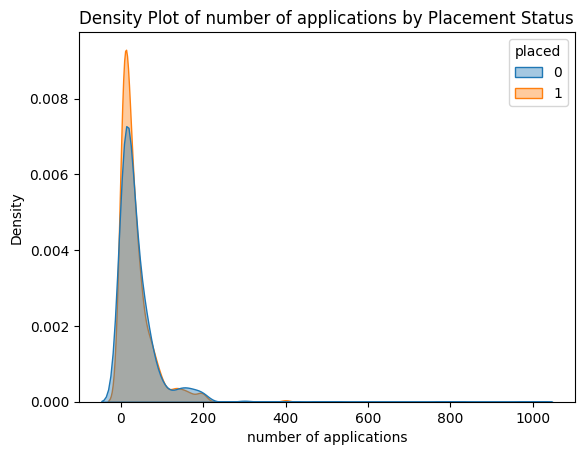

In [ ]:
sns.kdeplot(data=df, x='number_of_applications', hue='placed', fill=True, alpha=0.4)
plt.xlabel('number of applications')
plt.title('Density Plot of number of applications by Placement Status')
plt.show()

#scatterplot

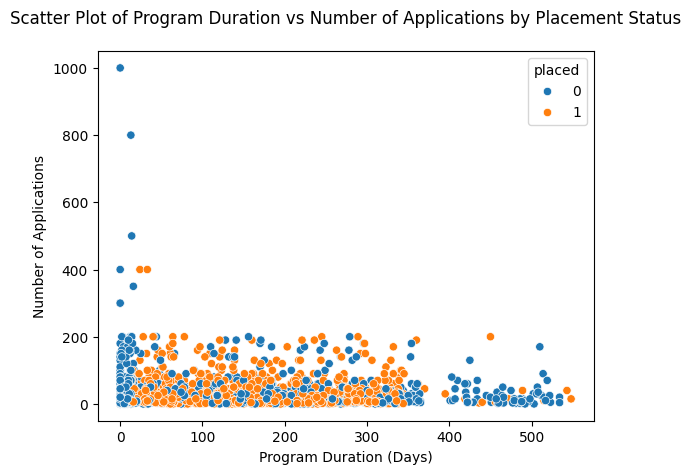

In [ ]:
sns.scatterplot(x='program_duration_days', y='number_of_applications', hue='placed', data=df)
plt.xlabel('Program Duration (Days)')
plt.ylabel('Number of Applications')
plt.title('Scatter Plot of Program Duration vs Number of Applications by Placement Status' ,pad=20)
plt.show()

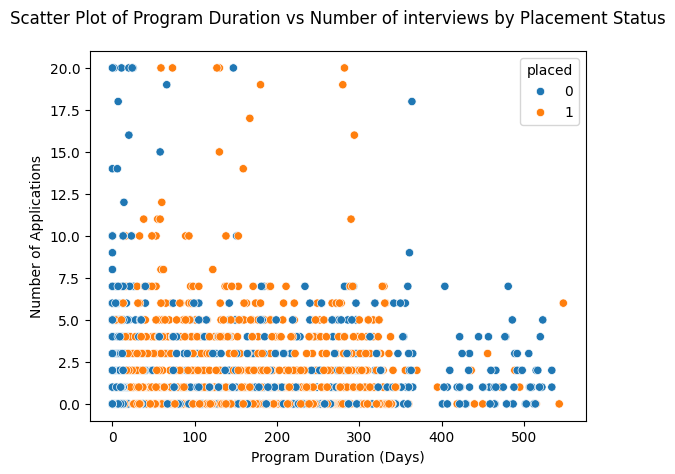

In [ ]:
sns.scatterplot(x='program_duration_days', y='number_of_interviews', hue='placed', data=df)
plt.xlabel('Program Duration (Days)')
plt.ylabel('Number of Applications')
plt.title('Scatter Plot of Program Duration vs Number of interviews by Placement Status' ,pad=20)
plt.show()

#pivot_table

In [ ]:
cols=[ 'primary_track', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search','program_duration_days',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)

primary_track,Data,Design,Marketing,PSO,SWE,Web
Not placed %,50.28,54.68,50.00,65.07,45.74,75.00
Placed %,49.72,45.32,50.00,34.93,54.26,25.00
population %,9.35,10.72,0.11,12.09,67.53,0.21


employment_status,Contractor,Employed Full-Time,Employed Part-Time,Student,Unemployed,Unknown
Not placed %,59.40,51.38,46.73,49.56,48.68,44.07
Placed %,40.60,48.62,53.27,50.44,51.32,55.93
population %,7.02,17.16,10.51,29.94,26.03,9.35


highest_level_of_education,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
Not placed %,48.82,41.00,64.29,16.67,51.92,50.50,69.23
Placed %,51.18,59.00,35.71,83.33,48.08,49.50,30.77
population %,55.70,5.28,0.74,0.63,31.63,5.33,0.69


length_of_job_search,1-2 months,3-5 months,6 months to a year,Less than one month,Over a year
Not placed %,46.46,52.72,50.30,50.22,50.00
Placed %,53.54,47.28,49.70,49.78,50.00
population %,31.36,19.43,8.92,35.64,4.65


program_duration_days,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000,54.000000,55.000000,56.000000,57.000000,58.000000,59.000000,60.000000,61.000000,62.000000,63.000000,64.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000,71.000000,72.000000,73.000000,74.000000,75.000000,76.000000,77.000000,78.000000,79.000000,80.000000,81.000000,82.000000,83.000000,84.000000,85.000000,86.000000,87.000000,88.000000,89.000000,90.000000,91.000000,92.000000,93.000000,94.000000,95.000000,96.000000,97.000000,98.000000,99.000000,100.000000,101.000000,102.000000,103.000000,104.000000,105.000000,106.000000,107.000000,108.000000,109.000000,110.000000,111.000000,112.000000,113.000000,114.000000,115.000000,116.000000,117.000000,118.000000,119.000000,120.000000,121.000000,122.000000,123.000000,124.000000,125.000000,126.000000,127.000000,128.000000,129.000000,130.000000,131.000000,132.000000,133.000000,135.000000,136.000000,137.000000,138.000000,139.000000,140.000000,141.000000,142.000000,143.000000,144.000000,145.000000,146.000000,147.000000,148.000000,149.000000,150.000000,151.000000,152.000000,153.000000,154.000000,155.000000,156.000000,157.000000,158.000000,159.000000,160.000000,161.000000,162.000000,163.000000,164.000000,165.000000,166.000000,167.000000,168.000000,169.000000,170.000000,171.000000,172.000000,173.000000,174.000000,175.000000,176.000000,177.000000,178.000000,179.000000,180.000000,181.000000,182.000000,183.000000,184.000000,185.000000,186.000000,187.000000,188.000000,189.000000,190.000000,191.000000,192.000000,193.000000,194.000000,195.000000,196.000000,197.000000,198.000000,199.000000,201.000000,202.000000,203.000000,204.000000,205.000000,206.000000,207.000000,208.000000,209.000000,210.000000,211.000000,212.000000,213.000000,214.000000,215.000000,216.000000,217.000000,219.000000,220.000000,221.000000,222.000000,223.000000,224.000000,225.000000,226.000000,227.000000,228.000000,229.000000,230.000000,232.000000,233.000000,234.000000,235.000000,236.000000,237.000000,239.000000,240.000000,241.000000,242.000000,243.000000,244.000000,245.000000,246.000000,247.000000,248.000000,249.000000,250.000000,252.000000,253.000000,254.000000,255.000000,256.000000,257.000000,258.000000,260.000000,261.000000,262.000000,263.000000,264.000000,265.000000,266.000000,267.000000,268.000000,269.000000,270.000000,271.000000,272.000000,274.000000,275.000000,276.000000,277.000000,278.000000,279.000000,280.000000,281.000000,282.000000,283.000000,284.000000,285.000000,286.000000,287.000000,288.000000,289.000000,290.000000,291.000000,292.000000,293.000000,294.000000,295.000000,296.000000,297.000000,298.000000,299.000000,300.000000,301.000000,302.000000,303.000000,304.000000,305.000000,306.000000,307.000000,308.000000,309.000000,310.000000,311.000000,312.000000,313.000000,314.000000,316.000000,317.000000,318.000000,319.000000,320.000000,321.000000,322.000000,323.000000,324.000000,325.000000,326.000000,327.000000,328.000000,329.000000,330.000000,331.000000,332.000000,334.000000,335.000000,336.000000,337.000000,338.000000,339.000000,340.000000,341.000000,342.000000,343.000000,344.000000,345.000000,347.000000,350.000000,351.000000,353.000000,354.000000,356.000000,357.000000,359.000000,360.000000,361.000000,362.000000,363.000000,364.000000,365.000000,370.000000,395.000000,401.000000,403.000000,404.000000,407.000000,410.000000,419.000000,420.000000,421.000000,422.000000,423.000000,425.000000,429.000000,430.000000,433.000000,434.000000,436.000000,440.000000,445.000000,450.000000,451.000

biggest_challenge_in_search,Behavioral interviewing,Figuring out which jobs to apply for,Getting past final round interviews,Getting past mid-stage interviews,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills
Not placed %,42.86,51.16,46.55,48.10,50.70,49.87,49.13,60.00,48.86,68.00
Placed %,57.14,48.84,53.45,51.90,49.30,50.13,50.87,40.00,51.14,32.00
population %,2.22,6.81,12.25,8.34,7.50,39.28,9.13,1.58,11.56,1.32


professional_experience,1-2 years,3-4 years,5+ years,Less than one year,Unknown
Not placed %,48.10,48.17,46.77,48.83,64.74
Placed %,51.90,51.83,53.23,51.17,35.26
population %,33.26,23.13,10.61,24.76,8.24


work_authorization_status,Canada Citizen,Citizen,F1 Visa/CPT,F1 Visa/OPT,Green Card,H1B,Not Authorized,Other,STEM OPT,Unknown
Not placed %,55.00,49.20,52.08,51.46,49.28,63.89,100.00,45.00,60.00,43.18
Placed %,45.00,50.80,47.92,48.54,50.72,36.11,nan,55.00,40.00,56.82
population %,1.06,43.14,5.07,25.24,7.29,1.90,0.21,4.22,0.26,11.62


gender,Decline to Self Identify,Female,Male,Non-Binary,Unknown
Not placed %,70.00,52.50,45.06,66.67,59.13
Placed %,30.00,47.50,54.94,33.33,40.87
population %,0.53,21.12,58.82,0.16,19.38


race,"Black, Afro-Caribbean, or African American",Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
Not placed %,63.53,63.64,50.64,57.14,40.38,nan,46.19,44.93,55.22
Placed %,36.47,36.36,49.36,42.86,59.62,100.00,53.81,55.07,44.78
population %,4.49,2.32,37.12,6.28,2.75,0.16,21.49,21.86,3.54


#Comparsing

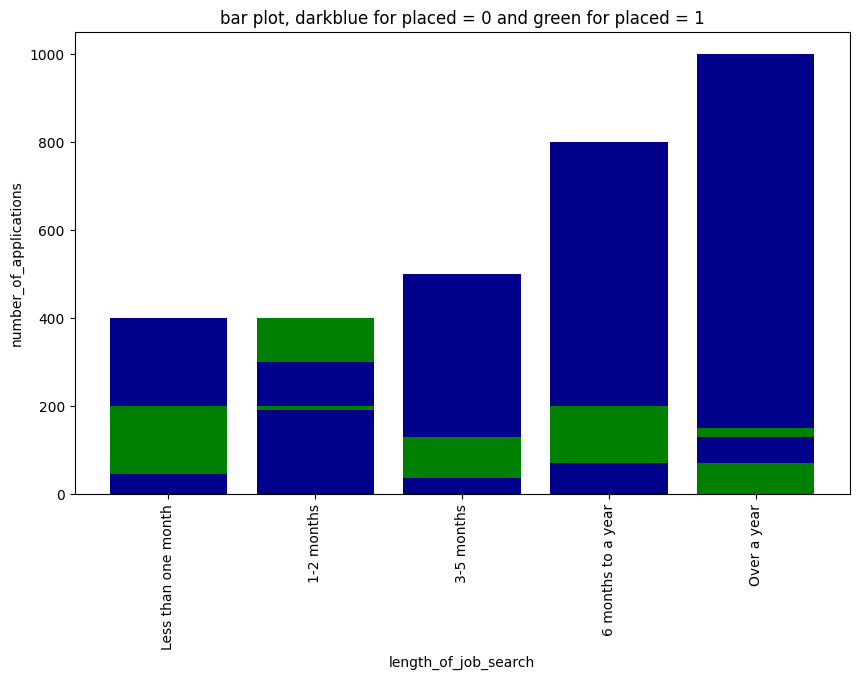

In [ ]:
categories = df['length_of_job_search']
values = df['number_of_applications']
placed = df['placed']

colors = ['darkblue' if p == 0 else 'green' for p in placed]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)


plt.title('bar plot, darkblue for placed = 0 and green for placed = 1')
plt.xlabel('length_of_job_search')
plt.ylabel('number_of_applications')
plt.xticks(rotation=90)


plt.show()

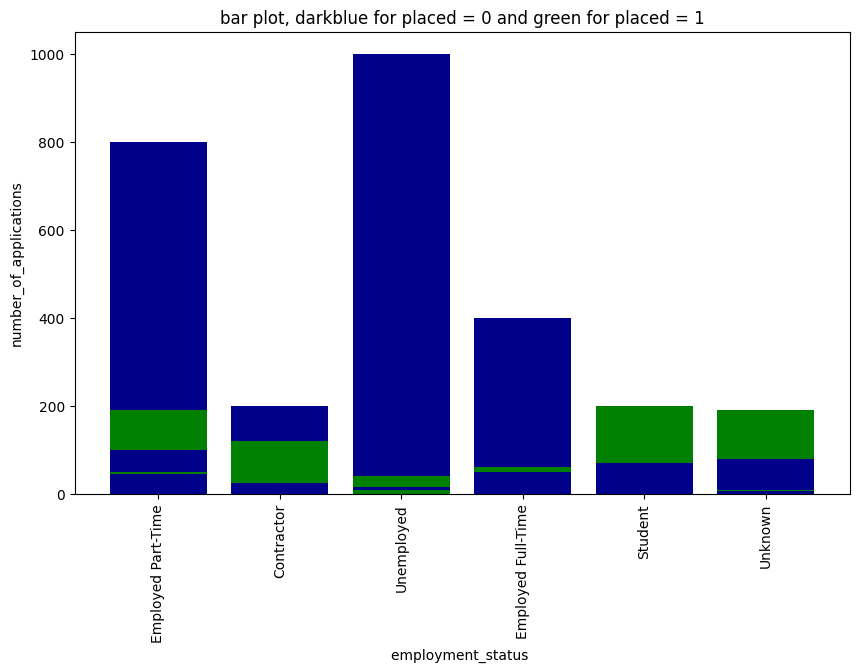

In [ ]:
categories = df['employment_status ']
values = df['number_of_applications']
placed = df['placed']

colors = ['darkblue' if p == 0 else 'green' for p in placed]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)


plt.title('bar plot, darkblue for placed = 0 and green for placed = 1')
plt.xlabel('employment_status ')
plt.ylabel('number_of_applications')
plt.xticks(rotation=90)


plt.show()

#LabelEncoder

In [35]:
le = LabelEncoder()
text_data_features = [ 'cohort_tag','primary_track', 'employment_status ', 'highest_level_of_education', 'length_of_job_search',
                      'biggest_challenge_in_search',  'professional_experience', 'work_authorization_status', 'gender', 'race']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df[i] = le.fit_transform(df[i])
    l3.append(list(df[i].unique())); l4.append(list(le.inverse_transform(df[i].unique())))
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-35-d5427a20b0c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-35-d5427a20b0c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-35-d5427a20b0c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

cohort_tag  :  [ 7  6 45  8 39 35 36 20 21 10 23 37 44 38 18 28 12 13  2  5  9 29 19 26
 43 34 42  3 32 22 25 11 24 27  0  1 31 41 46 33 40 14 17 15  4 47 30 16]  =  ['AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'OCT19A' 'NOV19A' 'NOV19B' 'JAN20A'
 'JAN20B' 'DEC19A' 'JUL19B' 'OCT18A' 'SEP18C' 'OCT18B' 'JAN19A' 'MAR19A'
 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A' 'MAR19B' 'JAN19B' 'JUN19B'
 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A' 'JUL19A' 'JUN19A' 'FEB18A'
 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A' 'OCT21A' 'SEP19B' 'MAY19B'
 'OCT19B' 'FEB20A' 'JAN18A' 'FEB20B' 'APR20A' nan 'MAR20A' 'FEB20a']
primary_track  :  [1 3 4 0 5 2]  =  ['Design' 'PSO' 'SWE' 'Data' 'Web' 'Marketing']
employment_status   :  [2 0 4 1 3 5]  =  ['Employed Part-Time' 'Contractor' 'Unemployed' 'Employed Full-Time'
 'Student' 'Unknown']
highest_level_of_education  :  [4 0 5 1 3 2 6]  =  ["Master's Degree" "Bachelor's Degree" 'Some College, No Degree'
 'Doctorate or Professional Degree' 'High School Graduate'
 'GED or 

In [36]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['placed'] = {0 : 'No placed', 1 : 'placed'}
tf1

{'cohort_tag': {7: 'AUG19B',
  6: 'AUG19A',
  45: 'SEP19A',
  8: 'AUG19C',
  39: 'OCT19A',
  35: 'NOV19A',
  36: 'NOV19B',
  20: 'JAN20A',
  21: 'JAN20B',
  10: 'DEC19A',
  23: 'JUL19B',
  37: 'OCT18A',
  44: 'SEP18C',
  38: 'OCT18B',
  18: 'JAN19A',
  28: 'MAR19A',
  12: 'FEB19A',
  13: 'FEB19B',
  2: 'APR19A',
  5: 'AUG18A',
  9: 'DEC18A',
  29: 'MAR19B',
  19: 'JAN19B',
  26: 'JUN19B',
  43: 'SEP18B',
  34: 'NOV18A',
  42: 'SEP18A',
  3: 'APR19B',
  32: 'MAY19A',
  22: 'JUL19A',
  25: 'JUN19A',
  11: 'FEB18A',
  24: 'JUN18A',
  27: 'MAR18A',
  0: 'APR18A',
  1: 'APR18B',
  31: 'MAY18A',
  41: 'OCT21A',
  46: 'SEP19B',
  33: 'MAY19B',
  40: 'OCT19B',
  14: 'FEB20A',
  17: 'JAN18A',
  15: 'FEB20B',
  4: 'APR20A',
  47: nan,
  30: 'MAR20A',
  16: 'FEB20a'},
 'primary_track': {1: 'Design',
  3: 'PSO',
  4: 'SWE',
  0: 'Data',
  5: 'Web',
  2: 'Marketing'},
 'employment_status ': {2: 'Employed Part-Time',
  0: 'Contractor',
  4: 'Unemployed',
  1: 'Employed Full-Time',
  3: 'Student',
  

In [ ]:
df

,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,1,7,0.0,0,2,4,3,1,3,1,0.0,0,2,2
3,3,7,0.0,0,0,0,3,2,3,1,5.0,25,2,1
4,4,6,89.0,1,4,0,0,5,0,3,10.0,100,2,2
5,4,6,0.0,0,1,4,0,8,1,4,5.0,100,2,2
6,4,7,0.0,0,1,4,3,4,1,4,0.0,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,3,46,0.0,0,1,4,3,1,1,1,0.0,20,4,7
2538,4,23,118.0,0,2,4,3,6,2,7,1.0,25,0,4
2539,1,24,457.0,0,0,4,2,8,2,1,4.0,15,2,6
2540,0,19,488.0,0,5,4,1,5,0,3,1.0,7,2,6


# Standardization

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

ss = StandardScaler() # Standardization


# Standardization
df['cohort_tag'] = ss.fit_transform(df[['cohort_tag']])
df['primary_track'] = ss.fit_transform(df[['primary_track']])
df['employment_status '] = ss.fit_transform(df[['employment_status ']])
df['length_of_job_search'] = ss.fit_transform(df[['length_of_job_search']])
df['professional_experience'] = ss.fit_transform(df[['professional_experience']])
df['gender'] = ss.fit_transform(df[['gender']])
#df['program_duration_days'] = ss.fit_transform(df[['program_duration_days']])
df['highest_level_of_education'] =ss.fit_transform(df[['highest_level_of_education']])
df['biggest_challenge_in_search'] = ss.fit_transform(df[['biggest_challenge_in_search']])
df['work_authorization_status'] = ss.fit_transform(df[['work_authorization_status']])
df['number_of_interviews'] =ss.fit_transform(df[['number_of_interviews']])
df['number_of_applications'] = ss.fit_transform(df[['number_of_applications']])
df['race'] =ss.fit_transform(df[['race']])

df.head()

<ipython-input-37-5dddfc118153>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cohort_tag'] = ss.fit_transform(df[['cohort_tag']])
<ipython-input-37-5dddfc118153>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primary_track'] = ss.fit_transform(df[['primary_track']])
<ipython-input-37-5dddfc118153>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,-1.575635,-1.213231,0.0,0,-0.555633,1.166482,1.008209,-1.694312,1.075465,-0.777517,-0.739628,-0.695471,-0.168987,-0.899805
3,-0.132573,-1.213231,0.0,0,-1.965369,-0.827036,1.008209,-1.214350,1.075465,-0.777517,1.027344,-0.224503,-0.168987,-1.313653
4,0.588958,-1.288109,89.0,1,0.854104,-0.827036,-1.195963,0.225537,-1.098421,-0.019413,2.794315,1.188401,-0.168987,-0.899805
5,0.588958,-1.288109,0.0,0,-1.260501,1.166482,-1.195963,1.665423,-0.373792,0.359639,1.027344,1.188401,-0.168987,-0.899805
6,0.588958,-1.213231,0.0,0,-1.260501,1.166482,1.008209,-0.254426,-0.373792,0.359639,-0.739628,-0.525922,-0.168987,-1.727502


In [38]:
df

,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,-1.575635,-1.213231,0.0,0,-0.555633,1.166482,1.008209,-1.694312,1.075465,-0.777517,-0.739628,-0.695471,-0.168987,-0.899805
3,-0.132573,-1.213231,0.0,0,-1.965369,-0.827036,1.008209,-1.214350,1.075465,-0.777517,1.027344,-0.224503,-0.168987,-1.313653
4,0.588958,-1.288109,89.0,1,0.854104,-0.827036,-1.195963,0.225537,-1.098421,-0.019413,2.794315,1.188401,-0.168987,-0.899805
5,0.588958,-1.288109,0.0,0,-1.260501,1.166482,-1.195963,1.665423,-0.373792,0.359639,1.027344,1.188401,-0.168987,-0.899805
6,0.588958,-1.213231,0.0,0,-1.260501,1.166482,1.008209,-0.254426,-0.373792,0.359639,-0.739628,-0.525922,-0.168987,-1.727502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,-0.132573,1.707016,0.0,0,-1.260501,1.166482,1.008209,-1.694312,-0.373792,-0.777517,-0.739628,-0.318697,1.850327,1.169440
2538,0.588958,-0.015181,118.0,0,-0.555633,1.166482,1.008209,0.705499,0.350837,1.496795,-0.386233,-0.224503,-2.188300,-0.072107
2539,-1.575635,0.059697,457.0,0,-1.965369,1.166482,0.273485,1.665423,0.350837,-0.777517,0.673949,-0.412890,-0.168987,0.755591
2540,-2.297166,-0.314694,488.0,0,1.558972,1.166482,-0.461239,0.225537,-1.098421,-0.019413,-0.386233,-0.563600,-0.168987,0.755591


<ipython-input-39-1a6a1fae3d09>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placed, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-39-1a6a1fae3d09>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_placed, ax=ax2, fit=norm, color='#56F9BB')


Text(0.5, 1.0, 'program_duration_days Distribution \n (not_placed)')

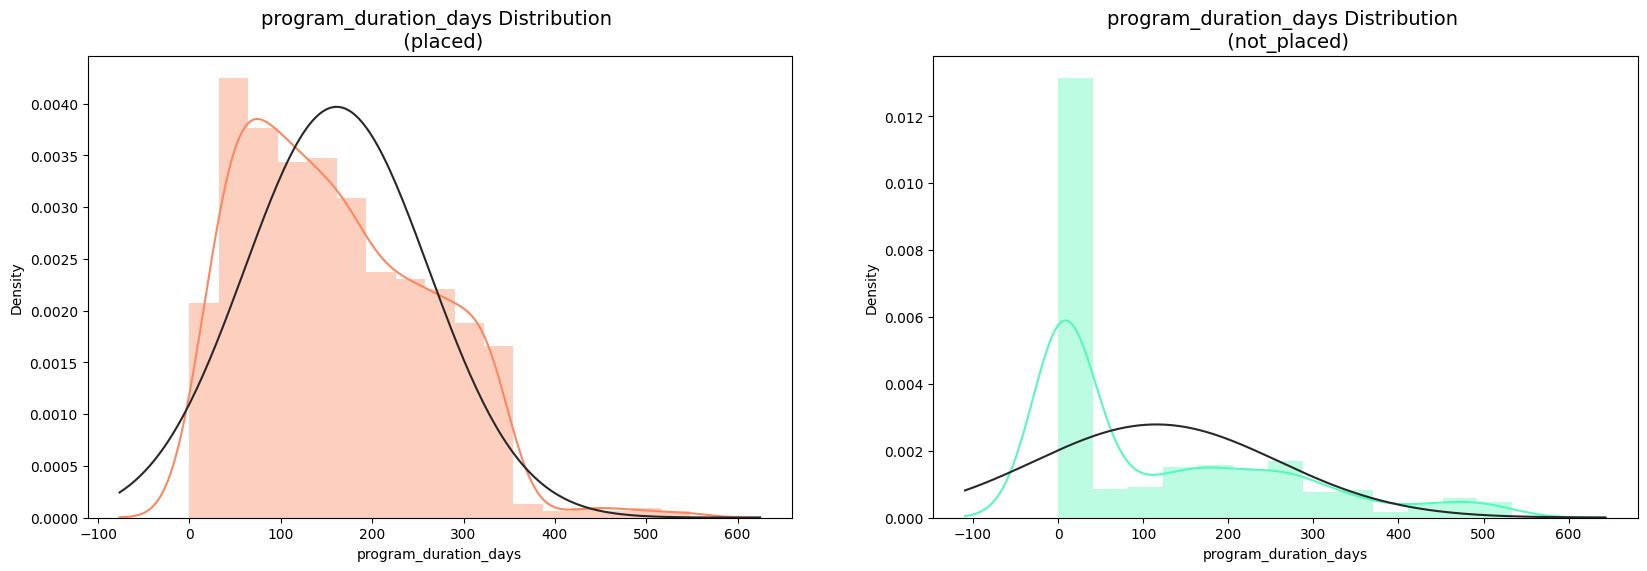

In [39]:
from scipy.stats import norm
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

placed = df['program_duration_days'][df['placed'] == 1]
sns.distplot(placed, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program_duration_days Distribution \n (placed)', fontsize=14)

not_placed = df['program_duration_days'][df['placed'] == 0]
sns.distplot(not_placed, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('program_duration_days Distribution \n (not_placed)', fontsize=14)

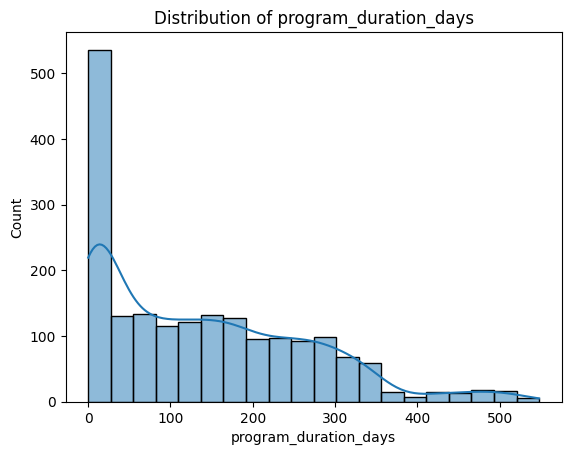

In [ ]:
sns.histplot(data=df, x='program_duration_days', bins=20, kde=True)
plt.xlabel('program_duration_days')
plt.ylabel('Count')
plt.title('Distribution of program_duration_days')
plt.show()

# Feature Engineering

In [40]:
x=df.drop ( columns=[ 'placed'])
y=df['placed']

# Modeling
### Placed

In [41]:
x_train , x_test , y_train , y_test =train_test_split (x , y , test_size=0.3 , random_state=101)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define parameter grids for GridSearchCV
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]},
    'Random Forest': {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 9]},
    'Logistic Regression': {'C': [0.1, 1, 10]}
}

# Perform GridSearchCV for each classifier
grids = {}
for clf_name, clf in classifiers.items():
    param_grid = param_grids[clf_name]
    grid = GridSearchCV(clf, param_grid, cv=10)
    grid.fit(x_train, y_train)
    grids[clf_name] = grid

# Access the best parameters and scores for each classifier if needed
for clf_name, grid in grids.items():
    print(f"Best parameters for {clf_name}: {grid.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {grid.best_score_}")


Best parameters for KNN: {'n_neighbors': 7}
Best cross-validation score for KNN: 0.7577181590339485
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.7456425153793574
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3}
Best cross-validation score for Decision Tree: 0.7600079744816586
Best parameters for Random Forest: {'max_depth': 9, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.7622863978127137
Best parameters for Logistic Regression: {'C': 1}
Best cross-validation score for Logistic Regression: 0.6098086124401914


In [43]:
knn = KNeighborsClassifier(n_neighbors=grids['KNN'].best_params_['n_neighbors'])
svm = SVC(C=grids['SVM'].best_params_['C'], kernel=grids['SVM'].best_params_['kernel'])
dt = DecisionTreeClassifier(criterion=grids['Decision Tree'].best_params_['criterion'], max_depth=grids['Decision Tree'].best_params_['max_depth'])
rf = RandomForestClassifier(n_estimators=grids['Random Forest'].best_params_['n_estimators'], max_depth=grids['Random Forest'].best_params_['max_depth'])
lr = LogisticRegression(C=grids['Logistic Regression'].best_params_['C'])

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [45]:
svm.fit(x_train, y_train)

SVC(C=10)

In [46]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=9)

In [48]:
lr.fit(x_train, y_train)

LogisticRegression(C=1)

In [49]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Suppress warnings
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Initializing models, model_names and evaluation metrics
models = {'KNN': knn, 'SVM': svm, 'DT': dt, 'RF': rf, 'LR': lr}
accuracies = {}
confusion_matrices = {}
fprs = {}
tprs = {}
aucs = {}

# Loop through models to make predictions using each model
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(x_test)

    # Evaluation metrics
    accuracies[model_name] = accuracy_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs[model_name] = fpr
    tprs[model_name] = tpr
    aucs[model_name] = auc(fpr, tpr)

# Print or further utilize the evaluation metrics as needed
for model_name, accuracy in accuracies.items():
    print(f"Accuracy for {model_name}: {accuracy}")


Accuracy for KNN: 0.789103690685413
Accuracy for SVM: 0.7926186291739895
Accuracy for DT: 0.7978910369068541
Accuracy for RF: 0.7926186291739895
Accuracy for LR: 0.616871704745167


Model: KNN
Accuracy Score: 0.79


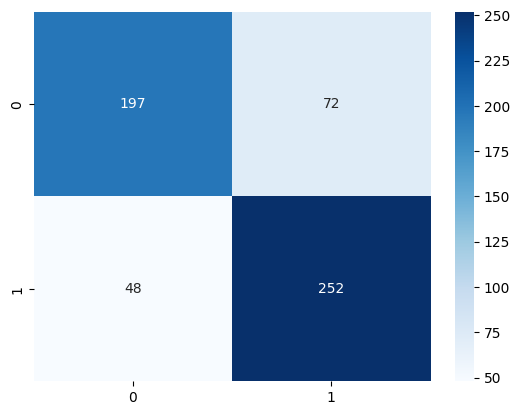

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       269
           1       0.78      0.84      0.81       300

    accuracy                           0.79       569
   macro avg       0.79      0.79      0.79       569
weighted avg       0.79      0.79      0.79       569
 

Model: SVM
Accuracy Score: 0.79


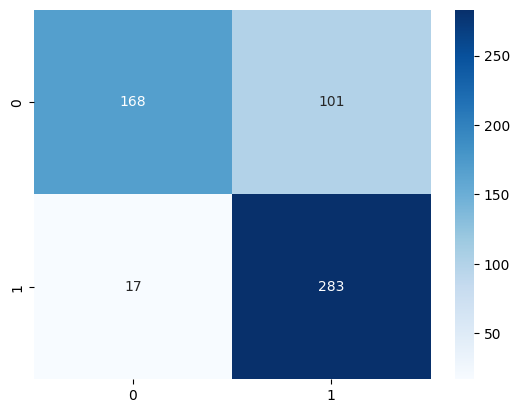

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       269
           1       0.74      0.94      0.83       300

    accuracy                           0.79       569
   macro avg       0.82      0.78      0.78       569
weighted avg       0.82      0.79      0.79       569
 

Model: DT
Accuracy Score: 0.80


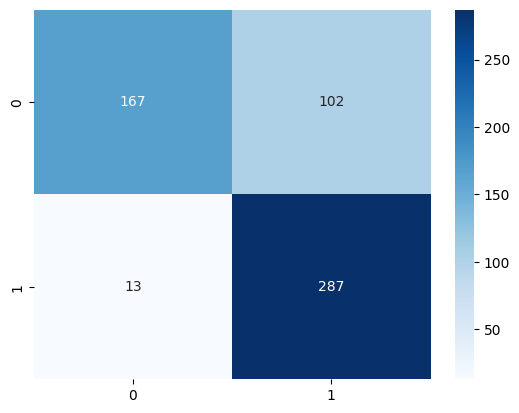

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       269
           1       0.74      0.96      0.83       300

    accuracy                           0.80       569
   macro avg       0.83      0.79      0.79       569
weighted avg       0.83      0.80      0.79       569
 

Model: RF
Accuracy Score: 0.79


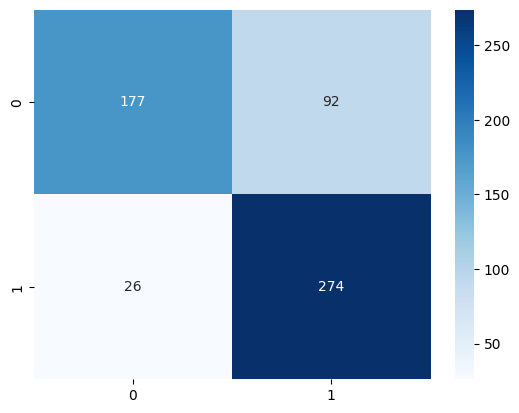

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       269
           1       0.75      0.91      0.82       300

    accuracy                           0.79       569
   macro avg       0.81      0.79      0.79       569
weighted avg       0.81      0.79      0.79       569
 

Model: LR
Accuracy Score: 0.62


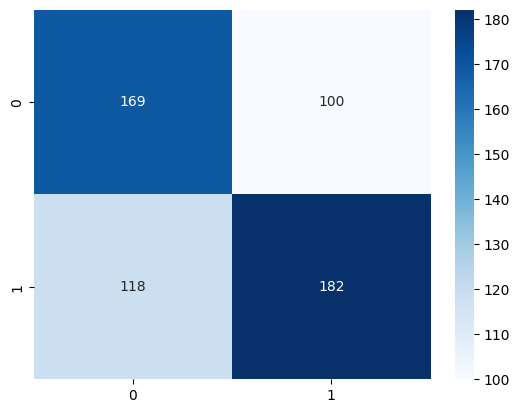

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       269
           1       0.65      0.61      0.63       300

    accuracy                           0.62       569
   macro avg       0.62      0.62      0.62       569
weighted avg       0.62      0.62      0.62       569
 



In [50]:
import matplotlib.pyplot as plt

for model_name, model in models.items():
    print(f"Model: {model_name}")
    print(f"Accuracy Score: {accuracies[model_name]:.2f}")
    sns.heatmap(confusion_matrices[model_name], annot=True, cmap="Blues", fmt='d')
    plt.show()
    y_pred = model.predict(x_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred), "\n")

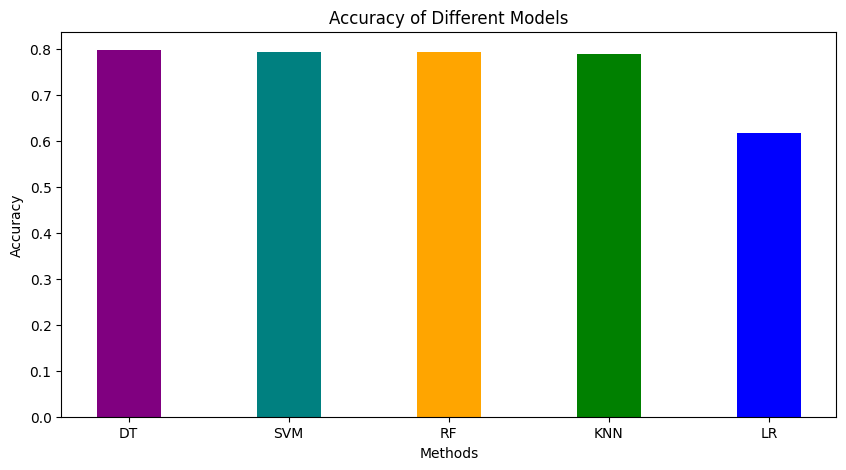

In [51]:
sorted_models = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

methods = [model[0] for model in sorted_models]
accu = [model[1] for model in sorted_models]

colors = ['purple', 'teal', 'orange', 'green', 'blue']

plt.figure(figsize=(10, 5))
plt.bar(methods, accu, color=colors, width=0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")

plt.show()


# Modeling
###program_duration_days

In [52]:
# Define features and target
X = df.drop(columns=['program_duration_days'])
y = df['program_duration_days']

In [53]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Results dictionary to store evaluation metrics
results = {}

for name, model in models.items():
    # Feature selection using Random Forest
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    sfm = SelectFromModel(rf, threshold='mean')
    sfm.fit(X_train, y_train)
    X_train_selected = sfm.transform(X_train)
    X_test_selected = sfm.transform(X_test)

    # Hyperparameter tuning
    param_grid = {}
    if name in ['Ridge Regression', 'Lasso Regression']:
        param_grid = {'alpha': [0.1, 1, 10, 100]}
    elif name == 'Decision Tree':
        param_grid = {'criterion': ['squared_error', 'absolute_error'], 'max_depth': [3, 5, 7, 9, 12], 'min_samples_split': [2, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 9, 12], 'min_samples_split': [2, 5, 10]}
    elif name == 'Gradient Boosting':
        param_grid = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7, 9]}

    grid_search = GridSearchCV(model, param_grid, cv=10)
    grid_search.fit(X_train_selected, y_train)
    best_model = grid_search.best_estimator_

    # Evaluation
    y_pred = best_model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'Best Params': grid_search.best_params_, 'MAE': mae, 'R²': r2}

# Print results
for name, result in results.items():
    print(f"Results for {name}:")
    print(f"Best parameters: {result['Best Params']}")
    print(f"MAE: {result['MAE']}")
    print(f"R²: {result['R²']}")
    print("\n")


Results for Linear Regression:
Best parameters: {}
MAE: 105.185731561436
R²: 0.009564190198251055


Results for Ridge Regression:
Best parameters: {'alpha': 100}
MAE: 105.57128938771541
R²: 0.003991674541425794


Results for Lasso Regression:
Best parameters: {'alpha': 10}
MAE: 106.22439897867825
R²: -0.0011199270616262247


Results for Decision Tree:
Best parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 10}
MAE: 107.73501940290127
R²: -0.062222819230243864


Results for Random Forest:
Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 150}
MAE: 105.30614758327366
R²: 0.006439723261317032


Results for Gradient Boosting:
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
MAE: 105.10418304963218
R²: 0.004448555913431185




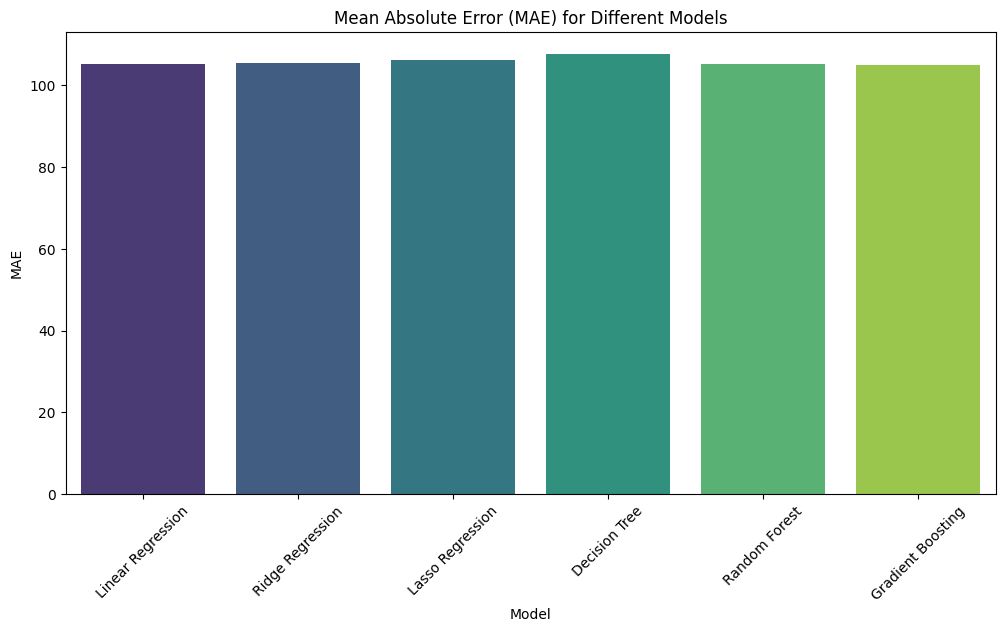

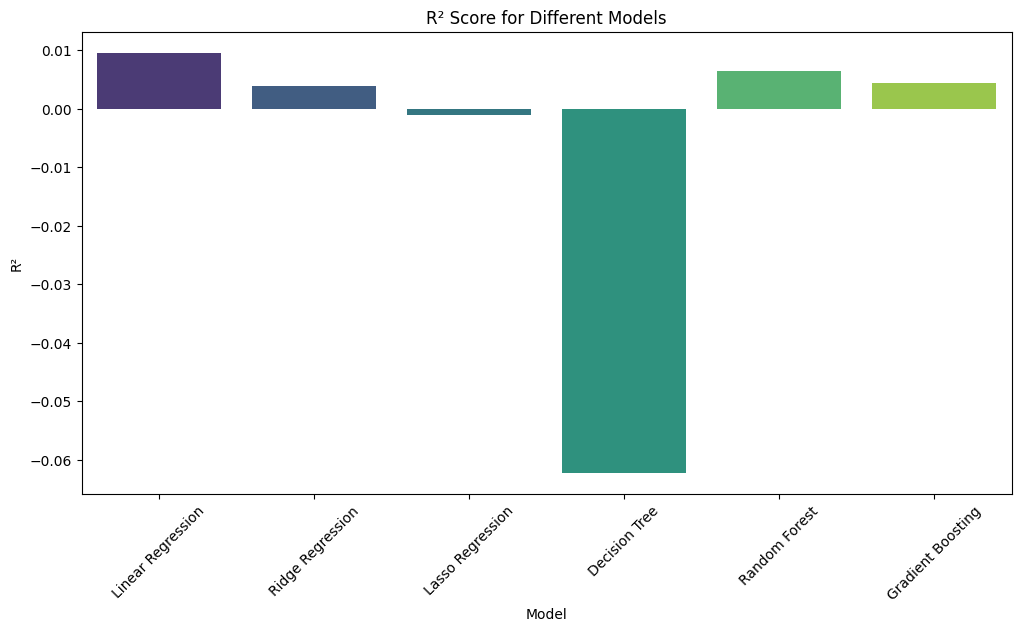

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the data for visualization
model_names = list(results.keys())
mae_values = [results[name]['MAE'] for name in model_names]
r2_values = [results[name]['R²'] for name in model_names]

# Create a DataFrame for easier plotting with Seaborn
import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'R²': r2_values
})

# Plotting MAE values
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plotting R² values
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title('R² Score for Different Models')
plt.ylabel('R²')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create and fit Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Create and fit Ridge Regression model
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [ ]:
# Create and fit Lasso Regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [ ]:
# Create and fit Decision Tree model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Create and fit Gradient Boosting model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()